In [1]:
import matplotlib.pyplot as plt 
import numpy as np

[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3. ]
[0.   0.04 0.16 0.36 0.64 1.   1.44 1.96 2.56 3.24 4.   4.84 5.76 6.76
 7.84 9.  ]


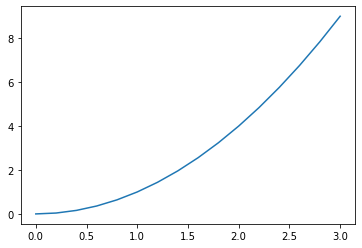

In [2]:
# create a numpy 1-D array with 16 evenly spaced values, from 0 to 3.
x = np.linspace(0, 3, 16)
print(x) 
# create a new numpy array. 
# x**2 means that each element of x is squared.
y = x**2
print(y)
# plot y versus x, you should get a parabola. 
# check that for x = 1 we have y = 1, and that for x = 2, y = 4. 
plt.plot(x, y)

In [3]:
from sklearn import datasets
digits = datasets.load_digits()

In [4]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [5]:
print(type(digits.images))
print(type(digits.target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [6]:
digits.images.shape

(1797, 8, 8)

In [7]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


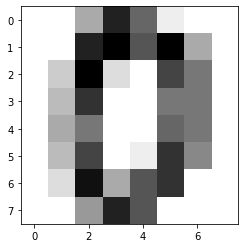

In [8]:
import matplotlib.pyplot as plt
plt.imshow(digits.images[0],cmap='binary')
plt.show()

In [9]:
print (digits.target.shape)
print (digits.target)

(1797,)
[0 1 2 ... 8 9 8]


In [10]:
def plot_multi(i):
    '''Plots 16 digits, starting with digit i'''
    nplots = 16
    fig = plt.figure(figsize=(15,15))
    for j in range(nplots):
        plt.subplot(4,4,j+1)
        plt.imshow(digits.images[i+j], cmap='binary')
        plt.title(digits.target[i+j])
        plt.axis('off')
    plt.show()

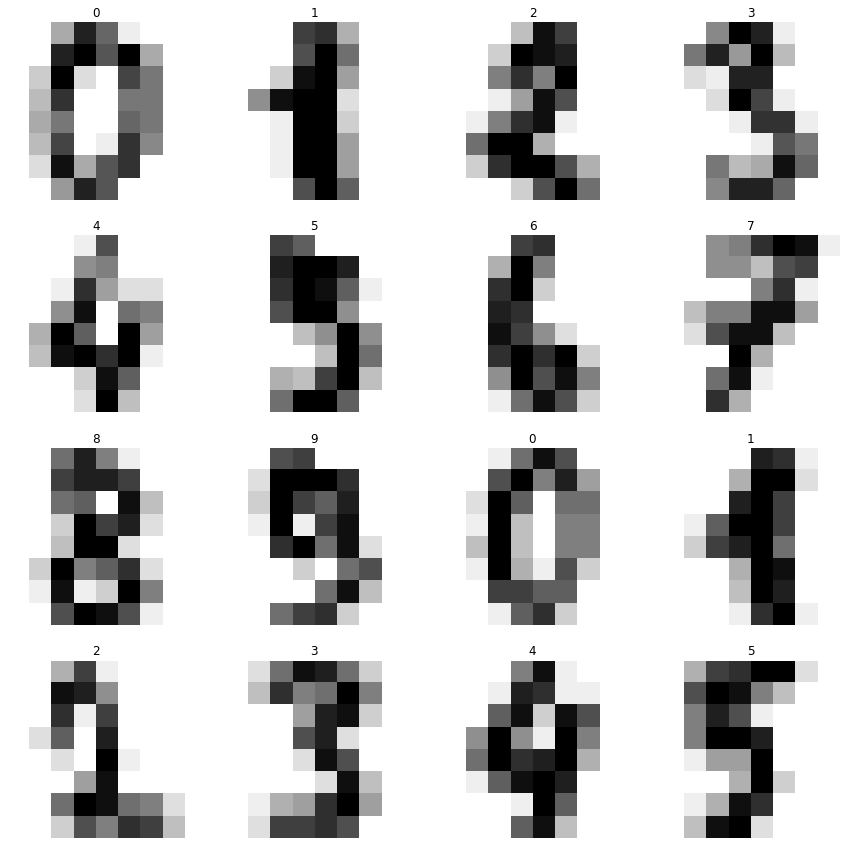

In [11]:
plot_multi(0)

In [12]:
y = digits.target
x = digits.images.reshape((len(digits.images), -1))
x.shape

(1797, 64)

In [13]:
x[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [14]:
x_train = x[:1000]
y_train = y[:1000]
x_test = x[1000:]
y_test = y[1000:]

In [15]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(50, 30, 20), max_iter=1000)

In [16]:
mlp.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=(50, 30, 20), max_iter=1000)

In [17]:
predictions = mlp.predict(x_test)
predictions[:50] 
# we just look at the 1st 50 examples in the test sample


array([1, 4, 0, 5, 3, 6, 5, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5,
       4, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 7, 3, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 0])

In [18]:
y_test[:50] 
# true labels for the 1st 50 examples in the test sample

array([1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5,
       4, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 0])

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

9.134253450439147e-01

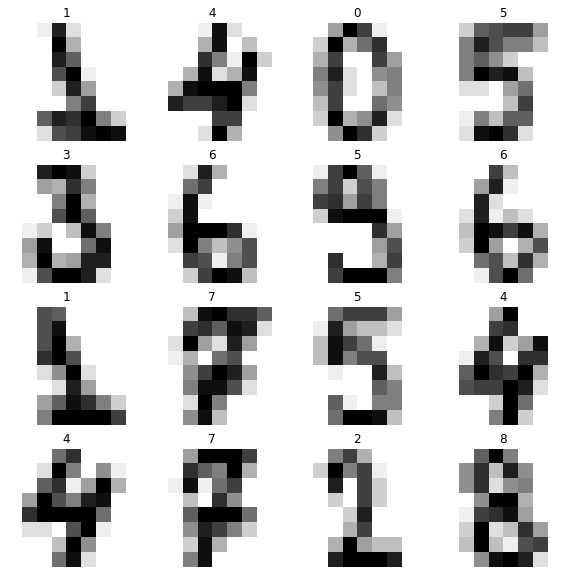

In [20]:
def plot_multi_pred(i):
    nplots = 16
    fig = plt.figure(figsize=(10,10))
    for j in range(nplots):
        plt.subplot(4,4,j+1)
        plt.imshow(x_test[i+j].reshape(8, 8), cmap='binary')
        plt.title(predictions[i+j])
        plt.axis('off')
    plt.show()
plot_multi_pred(0)